In [1]:
#Importing the Libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
#importing the dataset
data=pd.read_csv('Social_Network_Ads.csv')

In [3]:
#Checking the head of our datatset
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
#Checking the structure of our data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


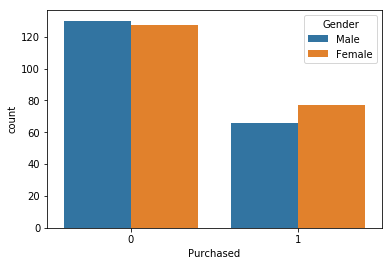

In [5]:
#Explotory Data Analysis
#Counting the Number of person purchased the car or not and diving them by their gender
sns.countplot(data['Purchased'],hue=data['Gender'])

C:\Users\Vishal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


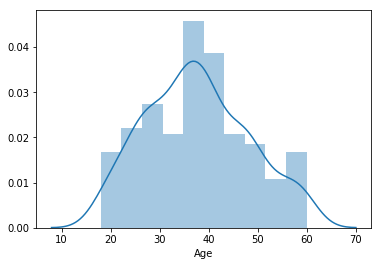

In [6]:
#Cheking the pattern of the Age of the persons of our dataset
sns.distplot(data['Age'])

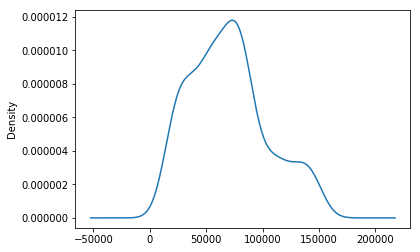

In [7]:
#Analysing the pattern of the estimated salary of the persons in our dataset
data['EstimatedSalary'].plot(kind='kde')

In [8]:
#train test split
#Diving the data into train and test spilt
from sklearn.model_selection import train_test_split
X=data[['Age','EstimatedSalary']]
y=data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
#features Scaling 
#Scaling the data 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [11]:
#taking the logistic Regression to make prediction 
#Fitting the model and making the model
from sklearn.linear_model import LogisticRegression

In [12]:
#making the object of out model 
#fitting the training data to our model to train our model
#Making predictions
model=LogisticRegression(random_state=0)
model.fit(X_train,y_train)
predictions=model.predict(X_test)

C:\Users\Vishal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
#Checking the performace of the model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [14]:
print('Confusion Matrix - \n',confusion_matrix(y_test,predictions))
print('\n')
print('Classification Report - \n',classification_report(y_test,predictions))
print('\n')
print('Accuracy Of Our Model -',accuracy_score(y_test,predictions))

Confusion Matrix - 
 [[74  5]
 [10 31]]


Classification Report - 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        79
           1       0.86      0.76      0.81        41

   micro avg       0.88      0.88      0.88       120
   macro avg       0.87      0.85      0.86       120
weighted avg       0.87      0.88      0.87       120



Accuracy Of Our Model - 0.875


In [15]:
#Now Training Another Model i.e K-nearest neighbours on the same datatset
#to obtain better accuarcy
from sklearn.neighbors import KNeighborsClassifier

In [16]:
#Making the object of the knn model 
#taking number of neighnbours as 5 intailly we can tweak this parameters
#depending upon the need.
knn_model=KNeighborsClassifier(n_neighbors=5)

In [17]:
#Fitting the model to our train dataset to train our model
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
#Making Predictions from our Model
knn_predictions=knn_model.predict(X_test)

In [19]:
#Evaluating the Performance of our Model 
print('Confusion Matrix - \n',confusion_matrix(y_test,knn_predictions))
print('\n')
print('Classification Report - \n',classification_report(y_test,knn_predictions))
print('\n')
print('Accuracy Of Our Model -',accuracy_score(y_test,knn_predictions))

Confusion Matrix - 
 [[73  6]
 [ 4 37]]


Classification Report - 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.86      0.90      0.88        41

   micro avg       0.92      0.92      0.92       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



Accuracy Of Our Model - 0.9166666666666666
